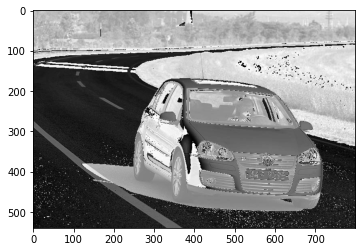

In [44]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#with open('/content/drive/MyDrive/Colab Notebooks/2022 CV/KU.raw',"rb") as fid:
#  img = np.fromfile(fid, dtype='int8', sep="")
#  img = np.reshape(img, [560, 720])
#  plt.imshow(img, cmap='gray', vmin=-128, vmax=127)

with open('/content/drive/MyDrive/Colab Notebooks/2022 CV/Golf.raw',"rb") as fid:
  img = np.fromfile(fid, dtype='int8', sep="")
  img = np.reshape(img, [540, 800])
  plt.imshow(img, cmap='gray', vmin=-128, vmax=127)

#with open('/content/drive/MyDrive/Colab Notebooks/2022 CV/Gundam.raw',"rb") as fid:
#  img = np.fromfile(fid, dtype='int8', sep="")
#  img = np.reshape(img, [600, 600])
#  plt.imshow(img, cmap='gray', vmin=-128, vmax=127)

In [2]:
with open('/content/drive/MyDrive/Colab Notebooks/2022 CV/KU.raw',"rb") as fid:
  img = np.fromfile(fid, dtype='int8', sep="")
  print(img)
  print(max(img), min(img))

[ 97 100 100 ...  41  50  57]
127 -128


cost: 333684514
cost: 333684514
cost: 333684514
cost: 333684514
cost: 333684514
cost: 333684514
cost: 333684514
cost: 333684514
cost: 333684514
cost: 333684514


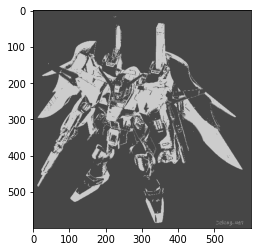

In [56]:
import torch
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

k = 2  # k = 2, 4, 8
rpt_num = 10
ks = np.random.choice(256, k)  # 0 ~ 255
ks -= 128

with open('/content/drive/MyDrive/Colab Notebooks/2022 CV/Gundam.raw',"rb") as fid:

  img = np.fromfile(fid, dtype='int8', sep="")
  point_k = np.zeros(len(img))

  for rpt in range(rpt_num):
    
    for i in range(len(img)):
      minn = abs(img[i] - ks[0])
      for j in range(1, k):
        temp = abs(img[i] - ks[j])
        if temp < minn:
          minn = temp
          point_k[i] = j

    for i in range(k):
      sum = 0
      cnt = 1e-6
      for j in range(len(img)):
        if point_k[j] == i:
          sum += img[j]
          cnt += 1
      ks[i] = int(sum / cnt)

    cost = 0
    for i in range(len(img)):
      cost += (img[i]-ks[int(point_k[i])])**2
    print("cost:", cost)

  for i in range(len(img)):
    img[i] = ks[int(point_k[i])]

  img = np.reshape(img, [600, 600])
  plt.imshow(img, cmap='gray', vmin=-128, vmax=127)

  #fids = open('/content/drive/MyDrive/Colab Notebooks/2022 CV/Gundam_2.raw', "bw")
  #img.tofile(fids)
  #fids.close()

alpha: [0.16786471415491735, 0.07892308627915416, 0.0010312262729482101, 0.03352827125863716, 9.8356017763447e-06, 0.7183853784838873, 0.0001477835028188131, 0.0001097044458596123]
mean : [88.67180404392256, 15.925686681796739, 0.0, -70.83146416750805, 0.0, -64.23147403481343, 0.0, 0.0]
sigma: [17.21219214392307, 17.814881818762395, 0.0, 62.81819371815814, 0.0, 20.19577975587311, 0.0, 0.0]


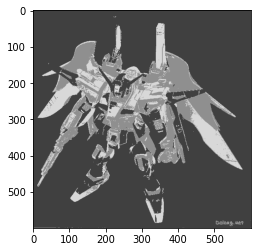

In [54]:
import torch
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

k = 8  # k = 2, 4, 8
rpt_num = 10
alphas = []
means = []
sigmas = []
for j in range(k):
  alphas.append(1/k)
  means.append(np.random.uniform(-128, 127))
  sigmas.append(np.random.uniform(1, 10))

def gaussian(alpha, mean, sigma, x):
  return alpha * (1/np.sqrt(2*np.pi*sigma**2+1e-6)) * np.exp(-(x-mean)**2/(2*sigma**2+1e-6))

with open('/content/drive/MyDrive/Colab Notebooks/2022 CV/Gundam.raw',"rb") as fid:

  img = np.fromfile(fid, dtype='int8', sep="")
  point_k = np.zeros(len(img))
  gaus = np.zeros((k, len(img)))

  for rpt in range(rpt_num):

    for j in range(k):
      for i in range(len(img)):
        gaus[j, i] = gaussian(alphas[j], means[j], sigmas[j], img[i])
    for i in range(len(img)):
      sum = 0
      for j in range(k):
        sum += gaus[j,i]
      for j in range(k):
        gaus[j][i] /= sum
    
    for i in range(len(img)):
      maxx = gaus[0, i]  # gaussian
      for j in range(1, k):
        temp = gaus[j, i]  # gaussian
        if temp > maxx:
          maxx = temp
          point_k[i] = j

    for j in range(k):
      a_sum = 0
      m_sum = 0
      m2_sum = 0
      cnt = 1e-6
      for i in range(len(img)):
        a_sum += gaus[j, i]
        if point_k[i] == j:
          m_sum += gaus[j, i] * img[i]
          m2_sum += gaus[j, i] * img[i]**2
          cnt += 1
      alphas[j] = a_sum / len(img)
      means[j] = m_sum / cnt
      sigmas[j] = np.sqrt(m2_sum/cnt - means[j]**2)

  print("alpha:", alphas)
  print("mean :", means)
  print("sigma:", sigmas)

  for i in range(len(img)):
    img[i] = means[int(point_k[i])]

  img = np.reshape(img, [600, 600])
  plt.imshow(img, cmap='gray', vmin=-128, vmax=127)

  fids = open('/content/drive/MyDrive/Colab Notebooks/2022 CV/Gundam_EM_8.raw', "bw")
  img.tofile(fids)
  fids.close()

In [55]:
for j in range(k):
  alphas[j] = round(alphas[j], 2)
  means[j] = round(means[j], 2)
  sigmas[j] = round(sigmas[j], 2)

print("alpha:", alphas)
print("mean :", means)
print("sigma:", sigmas)

alpha: [0.17, 0.08, 0.0, 0.03, 0.0, 0.72, 0.0, 0.0]
mean : [88.67, 15.93, 0.0, -70.83, 0.0, -64.23, 0.0, 0.0]
sigma: [17.21, 17.81, 0.0, 62.82, 0.0, 20.2, 0.0, 0.0]


In [ ]:
plt.hist(img)
plt.show()